In [1]:
# Mount
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Setup YOLO package

In [2]:
!git clone https://github.com/ultralytics/yolov5 # Clone the repository
!cd yolov5 && pip install -r requirements.txt # Install dependencies

Cloning into 'yolov5'...
remote: Enumerating objects: 17410, done.
remote: Counting objects: 100% (90/90), done.
remote: Compressing objects: 100% (68/68), done.
remote: Total 17410 (delta 63), reused 22 (delta 22), pack-reused 17320 (from 3)
Receiving objects: 100% (17410/17410), 16.30 MiB | 17.40 MiB/s, done.
Resolving deltas: 100% (11932/11932), done.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 119.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 76.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 51.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━

# Create dataset.yaml and new data directory

In [3]:
from pathlib import Path
import pandas as pd
import shutil

In [4]:
original_dataset_path = Path('/content/drive/MyDrive/MIDS/DATASCI 207/207 Final Project/Models/transformed_data')
new_dataset_path = Path("./dataset")
new_dataset_path.mkdir()
(new_dataset_path / "images").mkdir()
(new_dataset_path / "labels").mkdir()

In [5]:
for dataset in original_dataset_path.glob("*"):
  shutil.copytree(dataset / "images", (new_dataset_path / "images" / dataset.stem))

In [6]:
for dataset in original_dataset_path.glob("*"):
  (new_dataset_path / "labels" / dataset.stem).mkdir(parents=True)
  for label_file in (dataset / "bboxes").glob("*"):
    bboxes = pd.read_csv(label_file)[["label", "center_x", "center_y", "width", "height"]]
    bboxes["label"] = 0
    bboxes.to_csv((new_dataset_path / "labels" / dataset.stem / f"{label_file.stem}.txt"), header=False, sep=" ", index=False)

In [7]:
with open("./dataset.yaml", "w") as f:
  f.write(
"""# Dataset root directory relative to the yolov5 directory
path: ../dataset/

# Train/val/test sets: specify directories, *.txt files, or lists
train: images/train
val: images/val
test: images/test

# Classes
names:
    0: person
"""
  )

# Baseline Model

In [8]:
with open("./pretrained_dataset.yaml", "w") as f:
  f.write(
"""# Dataset root directory relative to the yolov5 directory
path: ../dataset/

# Train/val/test sets: specify directories, *.txt files, or lists
train: images/train
val: images/val
test: images/test

# Classes
names:
  0: person
  1: bicycle
  2: car
  3: motorcycle
  4: airplane
  5: bus
  6: train
  7: truck
  8: boat
  9: traffic light
  10: fire hydrant
  11: stop sign
  12: parking meter
  13: bench
  14: bird
  15: cat
  16: dog
  17: horse
  18: sheep
  19: cow
  20: elephant
  21: bear
  22: zebra
  23: giraffe
  24: backpack
  25: umbrella
  26: handbag
  27: tie
  28: suitcase
  29: frisbee
  30: skis
  31: snowboard
  32: sports ball
  33: kite
  34: baseball bat
  35: baseball glove
  36: skateboard
  37: surfboard
  38: tennis racket
  39: bottle
  40: wine glass
  41: cup
  42: fork
  43: knife
  44: spoon
  45: bowl
  46: banana
  47: apple
  48: sandwich
  49: orange
  50: broccoli
  51: carrot
  52: hot dog
  53: pizza
  54: donut
  55: cake
  56: chair
  57: couch
  58: potted plant
  59: bed
  60: dining table
  61: toilet
  62: tv
  63: laptop
  64: mouse
  65: remote
  66: keyboard
  67: cell phone
  68: microwave
  69: oven
  70: toaster
  71: sink
  72: refrigerator
  73: book
  74: clock
  75: vase
  76: scissors
  77: teddy bear
  78: hair drier
  79: toothbrush
"""
  )

In [12]:
# This doesnt show the loss out of the box
# Use the fix outlined in https://stackoverflow.com/questions/76499195/how-to-show-losses-when-running-validation-val-py-on-a-testing-dataset-in-ultr

!python ./yolov5/val.py  --data ./pretrained_dataset.yaml

val: data=./pretrained_dataset.yaml, weights=yolov5/yolov5s.pt, batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=yolov5/runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-416-gfe1d4d99 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
val: Scanning /content/dataset/labels/val.cache... 239 images, 0 backgrounds, 0 corrupt: 100% 239/239 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95   box_loss   obj_loss class_loss: 100% 8/8 [00:11<00:00,  1.41s/it]
                   all        239        608      0.659       0.63       0.65      0.403       1.29       1.09      0.278
Speed: 5.5ms pre-process, 2.0ms inference, 8.9ms NMS per image a



# Train various models

In [ ]:
# Create bash script to run trining of multiple models with one command
num_epochs = [5, 10]
batch_size = [8, 16]
optimizers = ["SGD", "AdamW"]

train_cmds = """
#!/bin/bash

"""

for e in num_epochs:
  for b in batch_size:
    for o in optimizers:
      run_str = f"python ./yolov5/train.py --img 640 --batch {b} --epochs {e} --optimizer {o} --name e{e}b{b}o{o} --data dataset.yaml --weights yolov5s.pt\n"
      train_cmds += run_str + "echo Finished training!\n"

with open("./train_cmds.sh", "w") as f:
  f.write(train_cmds)

In [ ]:
!cat train_cmds.sh


#!/bin/bash

python ./yolov5/train.py --img 640 --batch 8 --epochs 5 --optimizer SGD --name e5b8oSGD --data dataset.yaml --weights yolov5s.pt
echo Finished training!
python ./yolov5/train.py --img 640 --batch 8 --epochs 5 --optimizer AdamW --name e5b8oAdamW --data dataset.yaml --weights yolov5s.pt
echo Finished training!
python ./yolov5/train.py --img 640 --batch 16 --epochs 5 --optimizer SGD --name e5b16oSGD --data dataset.yaml --weights yolov5s.pt
echo Finished training!
python ./yolov5/train.py --img 640 --batch 16 --epochs 5 --optimizer AdamW --name e5b16oAdamW --data dataset.yaml --weights yolov5s.pt
echo Finished training!
python ./yolov5/train.py --img 640 --batch 8 --epochs 10 --optimizer SGD --name e10b8oSGD --data dataset.yaml --weights yolov5s.pt
echo Finished training!
python ./yolov5/train.py --img 640 --batch 8 --epochs 10 --optimizer AdamW --name e10b8oAdamW --data dataset.yaml --weights yolov5s.pt
echo Finished training!
python ./yolov5/train.py --img 640 --batch 16 --

In [ ]:
!bash train_cmds.sh

wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2025-04-17 16:12:39.219016: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744906359.240953    7156 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744906359.247129    7156 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5s.pt, cfg=, data=dataset.yaml, hyp=yolov5/data/hyps/hyp.scratch-low.yaml, epochs=5, batch_size=8, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=yolov5/data/hyps, resume_ev

In [ ]:
# For downloading locally and saving results
!zip -r ./runs.zip ./yolov5/runs/train/

  adding: yolov5/runs/train/ (stored 0%)
  adding: yolov5/runs/train/e5b16oAdamW/ (stored 0%)
  adding: yolov5/runs/train/e5b16oAdamW/val_batch0_labels.jpg (deflated 8%)
  adding: yolov5/runs/train/e5b16oAdamW/F1_curve.png (deflated 22%)
  adding: yolov5/runs/train/e5b16oAdamW/val_batch2_labels.jpg (deflated 8%)
  adding: yolov5/runs/train/e5b16oAdamW/train_batch0.jpg (deflated 2%)
  adding: yolov5/runs/train/e5b16oAdamW/train_batch1.jpg (deflated 2%)
  adding: yolov5/runs/train/e5b16oAdamW/val_batch0_pred.jpg (deflated 2%)
  adding: yolov5/runs/train/e5b16oAdamW/results.png (deflated 11%)
  adding: yolov5/runs/train/e5b16oAdamW/labels_correlogram.jpg (deflated 41%)
  adding: yolov5/runs/train/e5b16oAdamW/weights/ (stored 0%)
  adding: yolov5/runs/train/e5b16oAdamW/weights/best.pt (deflated 10%)
  adding: yolov5/runs/train/e5b16oAdamW/weights/last.pt (deflated 10%)
  adding: yolov5/runs/train/e5b16oAdamW/R_curve.png (deflated 17%)
  adding: yolov5/runs/train/e5b16oAdamW/results.csv (de

# Run best model on test set

In [ ]:
!python ./yolov5/detect.py --weights ./yolov5/runs/train/e10b16oSGD/weights/last.pt --source ./dataset/images/test/ --save-txt --save-format 0

detect: weights=['./yolov5/runs/train/e10b16oSGD/weights/last.pt'], source=./dataset/images/test/, data=yolov5/data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-413-gf2f86eb3 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/239 /content/dataset/images/test/1.png: 640x640 2 persons, 11.4ms
image 2/239 /content/dataset/images/test/102.png: 640x640 1 person, 11.5ms
image 3/239 /content/dataset/images/test/105.png: 640x640 1 person, 11.4ms
image 4/239 /content/dataset/images/test/106.png: 640x640 

# Use test predictions to calculate metrics

In [ ]:
from pathlib import Path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.utils.class_weight import compute_class_weight

In [ ]:
images_path = Path("./dataset/images/test/")
true_bboxes_path = Path("./dataset/labels/test/")
predicted_bboxes_path = Path("./yolov5/runs/detect/exp6/labels/")

In [ ]:
# Taken from data.ipynb

def get_iou(bb1, bb2, in_yolo_format=True):
    if in_yolo_format:
        bb1_right = bb1[0] + bb1[2] / 2
        bb1_left = bb1[0] - bb1[2] / 2
        bb1_bottom = bb1[1] + bb1[3] / 2
        bb1_top = bb1[1] - bb1[3] / 2

        bb2_right = bb2[0] + bb2[2] / 2
        bb2_left = bb2[0] - bb2[2] / 2
        bb2_bottom = bb2[1] + bb2[3] / 2
        bb2_top = bb2[1] - bb2[3] / 2
    else:
        bb1_left, bb1_right, bb1_top, bb1_bottom = bb1
        bb2_left, bb2_right, bb2_top, bb2_bottom = bb2

    intersection_width = min(bb1_right, bb2_right) - max(bb1_left, bb2_left)
    intersection_height = min(bb1_bottom, bb2_bottom) - max(bb1_top, bb2_top)

    if intersection_width <= 0 or intersection_height <= 0:
        return 0

    intersection_area = intersection_width * intersection_height

    bb1_area = (bb1_right - bb1_left) * (bb1_bottom - bb1_top)
    bb2_area = (bb2_right - bb2_left) * (bb2_bottom - bb2_top)

    union_area = bb1_area + bb2_area - intersection_area
    iou = intersection_area / union_area
    return iou

def is_pedestrian_in_sub_image(sub_image_bounds, image_size, labels, min_percentage=0.25):
    left = sub_image_bounds[0]
    right = sub_image_bounds[1]
    top = sub_image_bounds[2]
    bottom = sub_image_bounds[3]

    image_width = image_size[0]
    image_height = image_size[1]
    for l in labels:
        l_left = (l[0] - l[2] / 2) * image_width
        l_right = (l[0] + l[2] / 2) * image_width
        l_top = (l[1] - l[3] / 2) * image_height
        l_bottom = (l[1] + l[3] / 2) * image_height

        cl_left = max(left, l_left)
        cl_right = min(right, l_right)
        cl_top = max(top, l_top)
        cl_bottom = min(bottom, l_bottom)

        if cl_right < cl_left or cl_bottom < cl_top:
            iou = 0
        else:
            iou = get_iou((left, right, top, bottom), (cl_left, cl_right, cl_top, cl_bottom), in_yolo_format=False)

        if iou > min_percentage:
            return True

    return False


def create_sub_images(image, labels, sub_image_size=64):
    im = Image.fromarray(image)

    sub_images = []
    sub_image_contains_pedestrian = []
    for y in range(image.shape[0] // sub_image_size):
        for x in range(image.shape[1] // sub_image_size):
            left = x * sub_image_size
            right = left + sub_image_size
            top = y * sub_image_size
            bottom = top + sub_image_size
            sub_image = im.crop((left, top, right, bottom))
            sub_images.append(np.array(sub_image))
            sub_image_contains_pedestrian.append(
                is_pedestrian_in_sub_image((left, right, top, bottom), (image.shape[1], image.shape[0]), labels)
            )
    return sub_images, (image.shape[0] // sub_image_size, image.shape[1] // sub_image_size), sub_image_contains_pedestrian

In [ ]:
true_pedestrian_in_sub_image = []
pred_pedestrian_in_sub_image = []

for ip in images_path.glob("*"):
  i = ip.stem
  tbp = true_bboxes_path / (i + ".txt")
  pbp = predicted_bboxes_path / (i + ".txt")



  image = np.array(Image.open(ip))
  true_bboxes = pd.read_csv(tbp, header=None, sep=" ").values.tolist()

  sub_images, grid_shape, pedestrian_in_sub_image = create_sub_images(
      image,
      true_bboxes
  )
  true_pedestrian_in_sub_image.extend(pedestrian_in_sub_image)


   # If no detections found
  if not pbp.exists():
    pred_pedestrian_in_sub_image.extend([False] * len(pedestrian_in_sub_image))
    continue

  predicted_bboxes = pd.read_csv(pbp, header=None, sep=" ").values.tolist()
  sub_images, grid_shape, pedestrian_in_sub_image = create_sub_images(
      image,
      predicted_bboxes
  )
  pred_pedestrian_in_sub_image.extend(pedestrian_in_sub_image)


In [ ]:
accuracy_score(true_pedestrian_in_sub_image, pred_pedestrian_in_sub_image)

0.9772384937238494

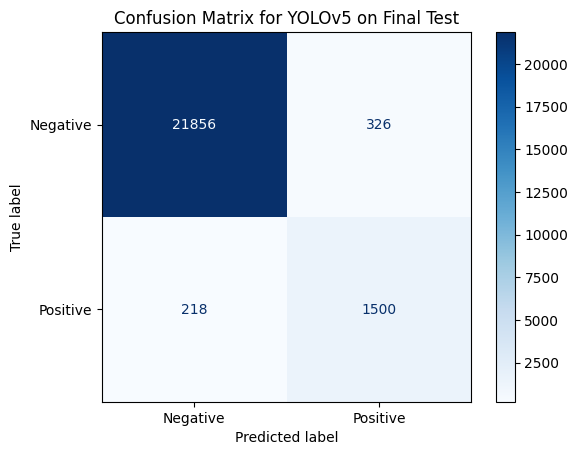

In [ ]:
# Confusion matrix
cm = confusion_matrix(true_pedestrian_in_sub_image, pred_pedestrian_in_sub_image)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Positive'])
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Confusion Matrix for YOLOv5 on Final Test')
plt.show()

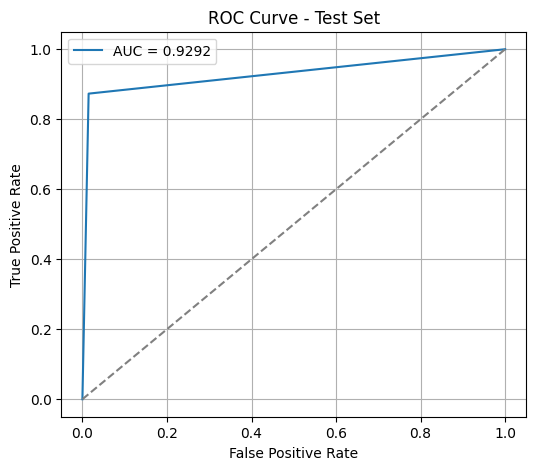

In [ ]:
# ROC curve
fpr, tpr, _ = roc_curve(true_pedestrian_in_sub_image, pred_pedestrian_in_sub_image)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.4f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Test Set")
plt.legend()
plt.grid(True)
plt.show()